# ANN Prediction
We use ToyotaCorolla.csv for this lab.

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

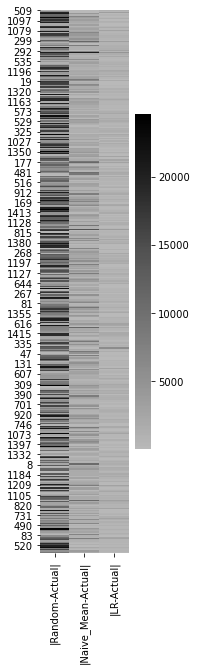

In [2]:
car_df = pd.read_csv('ToyotaCorolla.csv')
Selcelted_Columns = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight','Price']

car_df = car_df[Selcelted_Columns]
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Quarterly_Tax', 'Weight']
target = 'Price'

Data_X = pd.get_dummies(car_df[predictors], drop_first=True).drop(columns = ['Fuel_Type_Diesel'])
Data_y = car_df.Price

X_train, X_test, y_train, y_test = train_test_split(Data_X,Data_y,  test_size=0.3, random_state=1)

result_df = pd.DataFrame(index=X_test.index, columns=['Random','Naive_Mean','LR','Actual'])
result_df.Actual = y_test

# Method: Naive Mean
result_df.Naive_Mean = y_train.mean()

# Method: Random
result_df.Random = np.random.uniform(y_train.min(), y_train.max(),y_test.shape)

#Method: LR
car_lm = LinearRegression()
car_lm.fit(X_train, y_train)
result_df.LR =car_lm.predict(X_test)


result_df['|Random-Actual|'] = abs(result_df.Random-result_df.Actual)
result_df['|Naive_Mean-Actual|'] = abs(result_df.Naive_Mean-result_df.Actual)
result_df['|LR-Actual|'] = abs(result_df.LR-result_df.Actual)


table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [3]:
metric_df = pd.DataFrame(index = ['ME','RMSE', 'MAE','MAPE'] ,
                         columns = ['Random','Naive_Mean','LR'])

n_test = len(result_df)

for m in metric_df.columns:
    metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
    metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
    metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
    metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100
metric_df

,Random,Naive_Mean,LR
ME,-8225.52,-79.9342,101.68
RMSE,11936.9,3560.14,1247.11
MAE,9910.87,2616.75,966.948
MAPE,105.084,24.8512,9.65989


# MLP

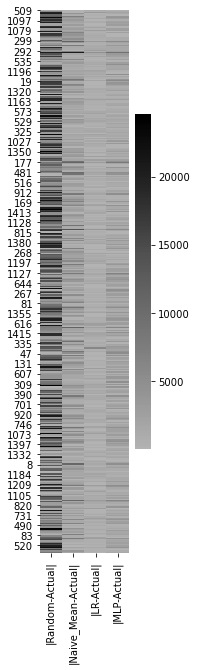

In [4]:
car_mlp = MLPRegressor(hidden_layer_sizes=5,max_iter=2000)
car_mlp.fit(X_train, y_train)

result_df['MLP'] = car_mlp.predict(X_test)
result_df['|MLP-Actual|'] = abs(result_df.MLP-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [5]:
m='MLP'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP
ME,-8225.52,-79.9342,101.68,103.869591
RMSE,11936.9,3560.14,1247.11,2382.789106
MAE,9910.87,2616.75,966.948,1891.285022
MAPE,105.084,24.8512,9.65989,17.984921


# Tune MLP

MLP is a random and complex model. For its successful application some levels of tuning is necessary.

The following are different parameters that can be tuned:

    - hidden_layer_sizes 
    - activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
        Activation function for the hidden layer.
    - solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
    - alpha, default=0.0001
    - learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
    - learning_rate_init, default=0.001
    - max_iter, default=200
    - shuffle, default=True
    
To tune MLP, we cannot use the testset. Why? 

So we chunk out another part of trainset as a tuning (validation) set. We use this set only tune the algorithm.

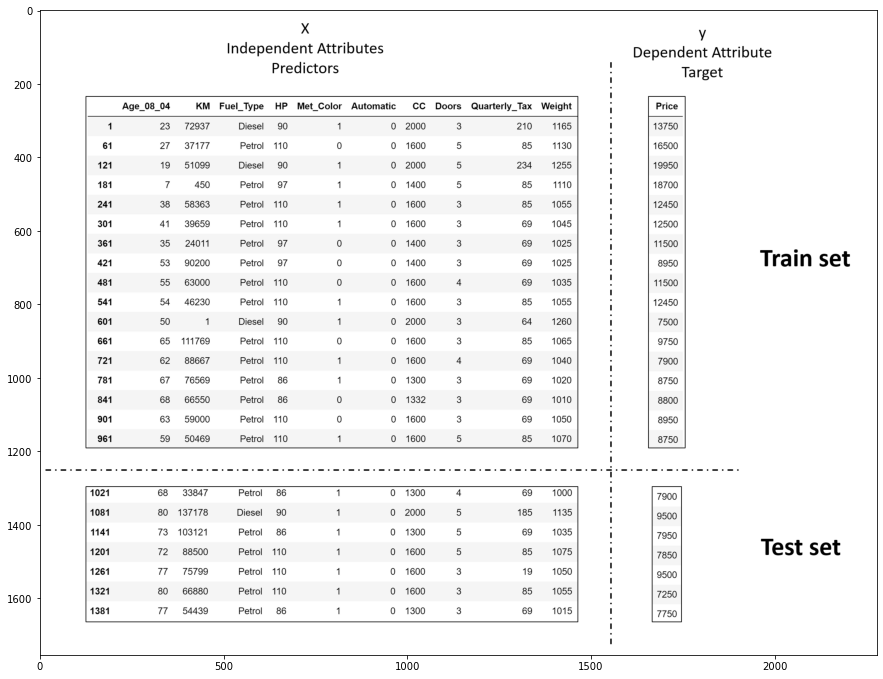

In [6]:
img = mpimg.imread('TrainTestSpilit.png')
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

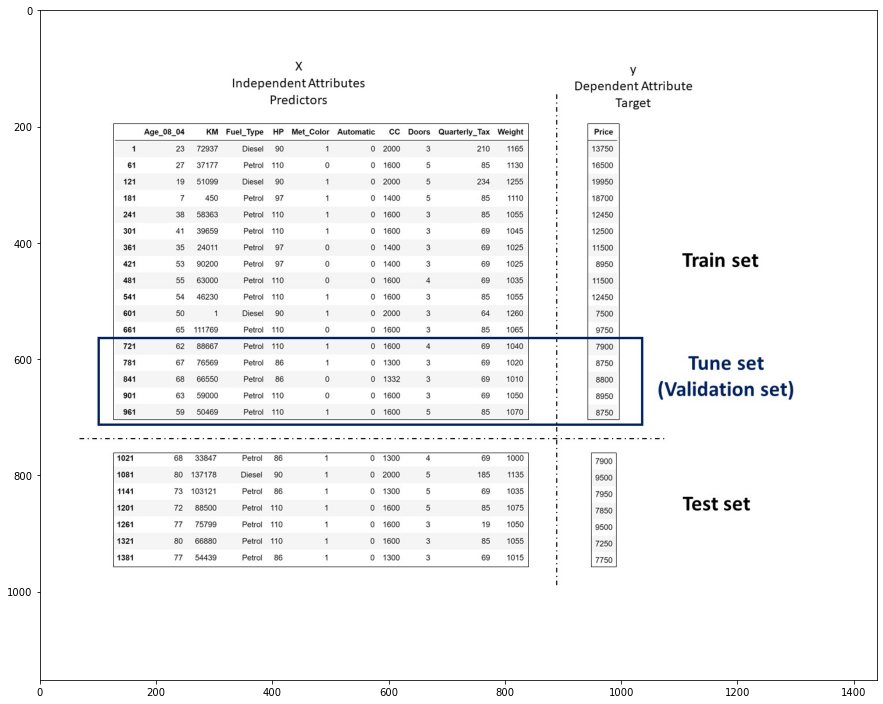

In [7]:
img = mpimg.imread('TrainTuneTestSplit.jpg')
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [8]:
# Create tuning (validation) set: devide the trainset

X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

print('X_train_s Shape: ', X_train_s.shape)
print('X_tune Shape: ', X_tune.shape)
print('y_train_s Shape: ', y_train_s.shape)
print('y_tune Shape: ', y_tune.shape)

X_train Shape:  (1005, 6)
y_train Shape:  (1005,)
X_train_s Shape:  (804, 6)
X_tune Shape:  (201, 6)
y_train_s Shape:  (804,)
y_tune Shape:  (201,)


# Tune for - activation and solver

In [9]:
num_repetition = 5

In [10]:
# Create a placeholder for experimentations
activation_options = ['identity', 'logistic', 'tanh', 'relu']
solver_options = ['lbfgs','sgd','adam']

my_index = pd.MultiIndex.from_product([activation_options,solver_options],
                                     names=('activation', 'solver'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df

R0   R1   R2   R3   R4
activation solver                         
identity   lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN
logistic   lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN
tanh       lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN
relu       lbfgs   NaN  NaN  NaN  NaN  NaN
           sgd     NaN  NaN  NaN  NaN  NaN
           adam    NaN  NaN  NaN  NaN  NaN

In [13]:
n = len(y_tune)
for activation_o in activation_options:
    for solver_o in solver_options:
        for rep in tune_df.columns:
            car_mlp = MLPRegressor(hidden_layer_sizes=(5), max_iter=2000,
                                   activation=activation_o,solver=solver_o)

            car_mlp.fit(X_train_s, y_train_s)
            y_tune_predict = car_mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(activation_o,solver_o),rep] = RSME
            

C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\roy_jafari

In [16]:
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

,,R0,R1,R2,R3,R4,Mean,Min
activation,solver,,,,,,,
identity,sgd,0,0,0,0,0,0.000000e+00,0.000000
relu,lbfgs,1487.88,1482.17,1490.92,1454.56,1376.5,1.458406e+03,1376.496650
identity,lbfgs,1496.57,1498.16,1498.15,1498.11,1498.05,1.497808e+03,1496.567058
relu,adam,2577.86,2608.14,2295.53,2288.94,2499.48,2.453988e+03,2288.935645
identity,adam,2607.05,2622,2616.86,2756.24,2602.95,2.641019e+03,2602.947414
logistic,lbfgs,3929.17,3929.17,3929.17,3929.17,3590.85,3.861502e+03,3590.850067
tanh,lbfgs,3732.36,3929.17,3929.17,3929.17,3696.34,3.843240e+03,3696.341653
logistic,sgd,3929.14,3930.77,3897.91,3933.48,3923.59,3.922978e+03,3897.908300
tanh,sgd,3928.94,3933.51,3931.82,3929.44,3931.34,3.931009e+03,3928.944507


Best ativation and solver for this case are **relu** and **lbfgs**. 

## Tune for hidden_layer_sizes

In [17]:
# This code is basically creating a list of 15 one layered ANN ([1] - [15]) 
# and 100 two layered ANNs ([1,1] - [10,10])

PossibleNetStrct = []
PossibleNetString = []

for i in range(1,16):
    netStruct = [i]
    PossibleNetStrct.append(netStruct)
    PossibleNetString.append(str(netStruct))
    print('Network Structure:', netStruct)
    
for i in range(1,11):
    for j in range(1,11):
        netStruct = [i,j]
        PossibleNetStrct.append(netStruct)
        PossibleNetString.append(str(netStruct))
        print('Network Structure:', netStruct)

Network Structure: [1]
Network Structure: [2]
Network Structure: [3]
Network Structure: [4]
Network Structure: [5]
Network Structure: [6]
Network Structure: [7]
Network Structure: [8]
Network Structure: [9]
Network Structure: [10]
Network Structure: [11]
Network Structure: [12]
Network Structure: [13]
Network Structure: [14]
Network Structure: [15]
Network Structure: [1, 1]
Network Structure: [1, 2]
Network Structure: [1, 3]
Network Structure: [1, 4]
Network Structure: [1, 5]
Network Structure: [1, 6]
Network Structure: [1, 7]
Network Structure: [1, 8]
Network Structure: [1, 9]
Network Structure: [1, 10]
Network Structure: [2, 1]
Network Structure: [2, 2]
Network Structure: [2, 3]
Network Structure: [2, 4]
Network Structure: [2, 5]
Network Structure: [2, 6]
Network Structure: [2, 7]
Network Structure: [2, 8]
Network Structure: [2, 9]
Network Structure: [2, 10]
Network Structure: [3, 1]
Network Structure: [3, 2]
Network Structure: [3, 3]
Network Structure: [3, 4]
Network Structure: [3, 

We run MLP 5 times for each of the possible network structures. Why?

In [18]:
tune_df = pd.DataFrame(np.nan, index =PossibleNetString,
                      columns = ['R{}'.format(i) for i in range(num_repetition)])

n = len(y_tune)

for i,netStr in enumerate(PossibleNetStrct):
    RowName = PossibleNetString[i]
    for rep in tune_df.columns:
        
        car_mlp = MLPRegressor(hidden_layer_sizes=netStr, activation = 'relu', 
                       solver='lbfgs', max_iter=2000)
        car_mlp.fit(X_train_s, y_train_s)
        
        y_tune_predict = car_mlp.predict(X_tune)
        RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
        
        tune_df.at[RowName, rep] = RSME
    print(netStr)

[1]
[2]
[3]
[4]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[1, 1]
[1, 2]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[1, 10]
[2, 1]
[2, 2]
[2, 3]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[2, 4]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[2, 5]
[2, 6]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[2, 7]
[2, 8]
[2, 9]
[2, 10]
[3, 1]
[3, 2]
[3, 3]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[3, 10]
[4, 1]
[4, 2]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[4, 3]
[4, 4]
[4, 5]
[4, 6]
[4, 7]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[4, 8]
[4, 9]
[4, 10]
[5, 1]
[5, 2]
[5, 3]
[5, 4]
[5, 5]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[5, 10]
[6, 1]
[6, 2]
[6, 3]
[6, 4]
[6, 5]
[6, 6]
[6, 7]
[6, 8]
[6, 9]
[6, 10]
[7, 1]
[7, 2]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[7, 3]
[7, 4]
[7, 5]
[7, 6]
[7, 7]
[7, 8]
[7, 9]
[7, 10]
[8, 1]
[8, 2]
[8, 3]
[8, 4]
[8, 5]
[8, 6]
[8, 7]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[8, 8]
[8, 9]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[8, 10]
[9, 1]
[9, 2]
[9, 3]
[9, 4]
[9, 5]
[9, 6]
[9, 7]
[9, 8]
[9, 9]
[9, 10]
[10, 1]
[10, 2]


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[10, 3]
[10, 4]
[10, 5]
[10, 6]
[10, 7]
[10, 8]
[10, 9]
[10, 10]


In [19]:
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

,R0,R1,R2,R3,R4,Mean,Min
"[8, 2]",1465.316350,1939.583085,1298.604210,3929.147634,1488.353548,2024.200965,1298.604210
"[3, 6]",3929.147634,1498.051842,2689.496732,1301.235174,1864.548335,2256.495943,1301.235174
"[7, 10]",1649.872277,1465.342389,2288.971872,2736.113964,1309.131797,1889.886460,1309.131797
"[5, 6]",1467.660588,1498.231744,1310.382437,1389.974496,2624.367850,1658.123423,1310.382437
[12],1312.122576,1481.607216,1471.524072,2118.882527,1351.706443,1547.168567,1312.122576
...,...,...,...,...,...,...,...
"[4, 5]",1509.306703,2161.734038,2593.190357,2781.503129,1508.352004,2110.817246,1508.352004
"[10, 3]",3929.147634,2029.530862,3929.147634,3929.147637,2087.927497,3180.980253,2029.530862
"[2, 5]",10058.212523,2198.375736,2352.854017,2135.540318,3929.147633,4134.826045,2135.540318
"[1, 3]",3929.147634,3929.147634,2670.186829,10054.808371,3929.147634,4902.487621,2670.186829


In [20]:
tune_df.sort_values('Mean')

,R0,R1,R2,R3,R4,Mean,Min
"[10, 7]",1352.336514,1438.462702,1419.799994,1320.674908,1485.600397,1403.374903,1320.674908
[10],1370.380165,1521.161449,1493.050018,1326.549022,1364.298947,1415.087920,1326.549022
"[7, 5]",1432.142388,1372.569811,1451.505007,1372.850967,1463.116396,1418.436914,1372.569811
"[6, 9]",1429.299569,1485.728045,1335.740333,1378.588171,1479.617639,1421.794752,1335.740333
"[4, 9]",1498.181063,1345.258955,1482.922887,1359.630252,1471.210012,1431.440634,1345.258955
...,...,...,...,...,...,...,...
[4],6888.990185,1497.519133,2157.254655,7195.425088,1792.205143,3906.278841,1497.519133
"[6, 1]",3929.147634,3929.147642,3929.147634,3929.147616,3929.147634,3929.147632,3929.147616
"[2, 5]",10058.212523,2198.375736,2352.854017,2135.540318,3929.147633,4134.826045,2135.540318
"[1, 6]",7812.426826,3929.147633,3929.147634,1498.172407,3929.147631,4219.608426,1498.172407


## Tune for learning_rate, learning_rate_init

In [21]:
LR_options = ['constant','invscaling','adaptive']
LRI_options = [0.0001,0.001,0.005,0.01,0.05,0.1]

my_index = pd.MultiIndex.from_product([LR_options,LRI_options],
                                     names=('LR', 'rate'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df

R0   R1   R2   R3   R4
LR         rate                           
constant   0.0001  NaN  NaN  NaN  NaN  NaN
           0.0010  NaN  NaN  NaN  NaN  NaN
           0.0050  NaN  NaN  NaN  NaN  NaN
           0.0100  NaN  NaN  NaN  NaN  NaN
           0.0500  NaN  NaN  NaN  NaN  NaN
           0.1000  NaN  NaN  NaN  NaN  NaN
invscaling 0.0001  NaN  NaN  NaN  NaN  NaN
           0.0010  NaN  NaN  NaN  NaN  NaN
           0.0050  NaN  NaN  NaN  NaN  NaN
           0.0100  NaN  NaN  NaN  NaN  NaN
           0.0500  NaN  NaN  NaN  NaN  NaN
           0.1000  NaN  NaN  NaN  NaN  NaN
adaptive   0.0001  NaN  NaN  NaN  NaN  NaN
           0.0010  NaN  NaN  NaN  NaN  NaN
           0.0050  NaN  NaN  NaN  NaN  NaN
           0.0100  NaN  NaN  NaN  NaN  NaN
           0.0500  NaN  NaN  NaN  NaN  NaN
           0.1000  NaN  NaN  NaN  NaN  NaN

In [22]:
for LR_o in LR_options:
    for LRI_o in LRI_options:
        for rep in tune_df.columns:
            car_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                                   activation='relu',solver='lbfgs',
                                   learning_rate=LR_o, learning_rate_init= LRI_o)

            car_mlp.fit(X_train_s, y_train_s)
            y_tune_predict = car_mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(LR_o,LRI_o),rep] = RSME
        print((LR_o,LRI_o))

('constant', 0.0001)
('constant', 0.001)
('constant', 0.005)
('constant', 0.01)
('constant', 0.05)
('constant', 0.1)
('invscaling', 0.0001)
('invscaling', 0.001)
('invscaling', 0.005)
('invscaling', 0.01)
('invscaling', 0.05)
('invscaling', 0.1)
('adaptive', 0.0001)
('adaptive', 0.001)
('adaptive', 0.005)
('adaptive', 0.01)
('adaptive', 0.05)
('adaptive', 0.1)


In [23]:
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

,,R0,R1,R2,R3,R4,Mean,Min
LR,rate,,,,,,,
invscaling,0.0100,1387.16,1494.33,1492.1,1321.05,1505.42,1440.011714,1321.048851
adaptive,0.0010,1355.73,1496.47,1743.81,1324.08,1321.17,1448.250819,1321.172382
constant,0.0050,1385.54,1335.7,1498.13,1342.16,1482.13,1408.731946,1335.699173
adaptive,0.0001,1494.99,1465.28,1341.96,1341.12,1468.4,1422.350574,1341.123183
invscaling,0.0001,1481.47,1471.09,1488.26,1456.63,1341.27,1447.745125,1341.271510
constant,0.0001,1360.66,2140.79,1498.76,1349.84,1474.12,1564.833921,1349.844510
invscaling,0.0010,1356.34,1474.5,1497.45,1482.13,1421.33,1446.351933,1356.343723
adaptive,0.1000,2093.28,1356.78,1422.32,1498.18,2481.92,1770.496628,1356.780688
invscaling,0.0050,1486.31,1360.91,1473.38,1422.37,1497.78,1448.152468,1360.914937


## Tune for max_iter, shuffle

In [24]:
max_iterations_options = [500,1000,2000,5000,10000]
shuffle_options = [True,False]

my_index = pd.MultiIndex.from_product([max_iterations_options,shuffle_options],
                                     names=('Max Iterations', 'shuffle'))

tune_df = pd.DataFrame(index = my_index,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df

R0   R1   R2   R3   R4
Max Iterations shuffle                         
500            True     NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN
1000           True     NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN
2000           True     NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN
5000           True     NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN
10000          True     NaN  NaN  NaN  NaN  NaN
               False    NaN  NaN  NaN  NaN  NaN

In [25]:
for max_iterations_o in max_iterations_options:
    for shuffle_o in shuffle_options:
        for rep in tune_df.columns:
            car_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=max_iterations_o,
                                   activation='relu',solver='lbfgs',
                                   learning_rate='invscaling', learning_rate_init= 0.01,
                                   shuffle = shuffle_o)

            car_mlp.fit(X_train_s, y_train_s)
            y_tune_predict = car_mlp.predict(X_tune)
            RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
            
            tune_df.at[(max_iterations_o,shuffle_o),rep] = RSME
        print((max_iterations_o,shuffle_o))

C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

(500, True)


C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roy_jafari\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

(500, False)
(1000, True)
(1000, False)
(2000, True)
(2000, False)
(5000, True)
(5000, False)
(10000, True)
(10000, False)


In [26]:
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

,,R0,R1,R2,R3,R4,Mean,Min
Max Iterations,shuffle,,,,,,,
500,False,1319.12,1952.21,1358.21,1496.63,2070.97,1639.429018,1319.123020
2000,False,1383.95,1441.93,1455.04,1492.78,1371.75,1429.088871,1371.745767
5000,True,1499.96,1483.65,1477.37,1375.58,2011.77,1569.666245,1375.576560
10000,True,1472.76,1405.3,2069.69,2393.94,1482.19,1764.776319,1405.299710
2000,True,1477.17,1456.64,1434.19,1494.17,1472.67,1466.967052,1434.194976
10000,False,1463.87,1444.39,1560.51,2273.2,1446.04,1637.601518,1444.391462
1000,False,1510.5,1478.3,1498.07,2061.97,1460.58,1601.881536,1460.578832
5000,False,2074.19,1669.76,1476.74,1493.23,1493.28,1641.438135,1476.737976
500,True,1488.68,1497.49,1482.21,2070.38,1481.06,1603.964875,1481.060998


# Tune for alpha


In [27]:
alpha_options =[0.00001,0.00005,0.0001,0.0005,0.001,0.005]

tune_df = pd.DataFrame(index = alpha_options,
                       columns=['R{}'.format(i) for i in range(num_repetition)])

tune_df

,R0,R1,R2,R3,R4
0.00001,NaN,NaN,NaN,NaN,NaN
0.00005,NaN,NaN,NaN,NaN,NaN
0.00010,NaN,NaN,NaN,NaN,NaN
0.00050,NaN,NaN,NaN,NaN,NaN
0.00100,NaN,NaN,NaN,NaN,NaN
0.00500,NaN,NaN,NaN,NaN,NaN


In [28]:
for alpha_o in alpha_options:
    for rep in tune_df.columns:
        car_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha=alpha_o)
        car_mlp.fit(X_train_s, y_train_s)
        y_tune_predict = car_mlp.predict(X_tune)
        RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
        tune_df.at[alpha_o,rep] = RSME
    print(alpha_o)

1e-05
5e-05
0.0001
0.0005
0.001
0.005


In [29]:
tune_df['Mean'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].mean(axis=1)
tune_df['Min'] = tune_df[
    ['R{}'.format(i) for i in range(num_repetition)]].min(axis=1)
tune_df.sort_values('Min')

,R0,R1,R2,R3,R4,Mean,Min
0.00005,2650.57,2351.55,1308.38,1468.57,1484.07,1852.629016,1308.381912
0.00010,1447.86,2495.05,1343.89,1454.71,1496.72,1647.643813,1343.886370
0.00050,1499.96,1491.25,1498.12,1484.3,1358.56,1466.438849,1358.557748
0.00100,2170.37,1498.25,1480.98,1466.07,1482.59,1619.652500,1466.070497
0.00001,1667.12,1468.32,1942.16,1484.14,1484.54,1609.257886,1468.322840
0.00500,1499.19,2116.38,1484.81,1507.64,1497.48,1621.099969,1484.810292


# Tune for Randomness


In [30]:
random_options = range(1,10)

tune_df = pd.DataFrame(index = random_options,
                       columns=['RSME'])
tune_df

,RSME
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [32]:
for random_o in random_options:
    car_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005, random_state=random_o)
    car_mlp.fit(X_train_s, y_train_s)
    y_tune_predict = car_mlp.predict(X_tune)
    RSME = np.sqrt(np.sum((y_tune_predict - y_tune)**2)/n)
    tune_df.at[random_o,'RSME'] = RSME
    print(random_o)

1
2
3
4
5
6
7
8
9


In [33]:
tune_df

,RSME
1,1481.45
2,1353.12
3,2075.25
4,1481.44
5,1497.88
6,1369.95
7,1359.79
8,1460.4
9,1456.11


# Train the tuned MLP on train set

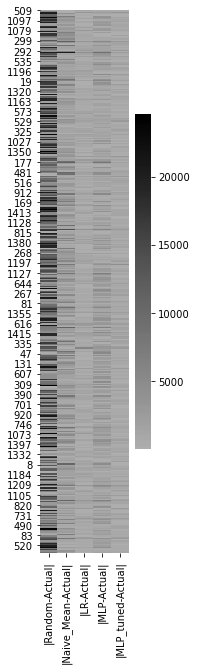

In [34]:
car_mlp = MLPRegressor(hidden_layer_sizes=(10), max_iter=2000,
                               activation='relu',solver='lbfgs', learning_rate='invscaling',
                               learning_rate_init= 0.01, shuffle = False, alpha = 0.00005,random_state=2)

car_mlp.fit(X_train_s, y_train_s)
result_df['MLP_tuned'] = car_mlp.predict(X_test)
result_df['|MLP_tuned-Actual|'] = abs(result_df.MLP_tuned-result_df.Actual)

table = result_df[['|Random-Actual|','|Naive_Mean-Actual|','|LR-Actual|','|MLP-Actual|','|MLP_tuned-Actual|']]

plt.figure(figsize=(2,10))
sns.heatmap(table, center=table.mean().mean(),cmap="Greys")
plt.show()

In [35]:
m='MLP_tuned'

metric_df.at['ME',m]= np.sum((result_df.Actual - result_df[m]))/n_test
metric_df.at['RMSE',m]= np.sqrt(np.sum(result_df.apply(lambda r: (r.Actual - r[m])**2,axis=1))/n_test)
metric_df.at['MAE',m] = np.sum(abs(result_df.Actual - result_df[m]))/n_test
metric_df.at['MAPE',m] = np.sum(result_df.apply(lambda r:abs(r.Actual-r[m])/r.Actual,axis=1))/n_test*100

metric_df

,Random,Naive_Mean,LR,MLP,MLP_tuned
ME,-8225.52,-79.9342,101.68,103.869591,75.647044
RMSE,11936.9,3560.14,1247.11,2382.789106,1183.176233
MAE,9910.87,2616.75,966.948,1891.285022,938.983890
MAPE,105.084,24.8512,9.65989,17.984921,9.419484
